In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
signals = pd.read_csv("E:/Python Programs/Signals.csv")
signals.head()

,id,sample,sign_type,r1,g1,b1,r2,g2,b2,r3,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
0,1,train,pedestrian,155,228,251,135,188,101,156,...,244,172,228,235,177,235,244,22,52,53
1,2,train,pedestrian,142,217,242,166,204,44,142,...,237,182,228,143,171,228,196,164,227,237
2,3,train,pedestrian,57,54,50,187,201,68,51,...,59,76,84,22,82,93,17,58,60,60
3,4,train,pedestrian,22,35,41,171,178,26,19,...,34,64,61,4,211,222,78,19,27,29
4,5,train,pedestrian,169,179,170,231,254,27,97,...,91,188,205,78,125,147,20,160,183,187


In [3]:
signals.sign_type.value_counts()

sign_type
stop          71
speed         70
pedestrian    65
Name: count, dtype: int64

In [4]:
signals_train = signals[signals["sample"]=="train"]
signals_test = signals[signals["sample"]=="test"]
signals_train.shape, signals_test.shape

((146, 51), (59, 51))

In [9]:
X_train = signals_train.loc[:,"r1":"b16"]
y_train = signals_train["sign_type"]
X_test = signals_test.loc[:,"r1":"b16"]
y_test = signals_test["sign_type"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((146, 48), (146,), (59, 48), (59,))

In [8]:
X_test.index, y_test.index

(Index([  7,  12,  13,  18,  19,  21,  28,  29,  35,  43,  44,  45,  46,  49,
         51,  52,  56,  61,  62,  65,  66,  68,  73,  74,  77,  81,  83,  99,
        100, 102, 109, 112, 116, 122, 123, 129, 130, 131, 132, 134, 136, 139,
        141, 142, 147, 150, 153, 155, 156, 163, 173, 174, 180, 182, 191, 192,
        200, 202, 204],
       dtype='int64'),
 Index([  7,  12,  13,  18,  19,  21,  28,  29,  35,  43,  44,  45,  46,  49,
         51,  52,  56,  61,  62,  65,  66,  68,  73,  74,  77,  81,  83,  99,
        100, 102, 109, 112, 116, 122, 123, 129, 130, 131, 132, 134, 136, 139,
        141, 142, 147, 150, 153, 155, 156, 163, 173, 174, 180, 182, 191, 192,
        200, 202, 204],
       dtype='int64'))

In [10]:
X_train.describe()

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,...,b13,r14,g14,b14,r15,g15,b15,r16,g16,b16
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.00000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,100.869863,114.890411,111.301370,110.924658,97.719178,76.890411,115.828767,104.410959,93.136986,105.60274,...,84.821918,117.431507,103.191781,78.671233,115.801370,100.589041,79.636986,92.438356,100.787671,80.356164
std,61.989350,68.134767,70.806815,55.710593,63.823544,55.693635,51.764768,65.049442,60.648635,60.96279,...,64.720266,56.809289,68.242399,61.612147,57.511333,68.738653,62.102238,59.284350,63.448291,59.436984
min,3.000000,12.000000,12.000000,1.000000,11.000000,1.000000,17.000000,10.000000,10.000000,13.00000,...,2.000000,17.000000,12.000000,2.000000,19.000000,12.000000,2.000000,11.000000,18.000000,2.000000
25%,46.750000,55.000000,49.250000,68.000000,42.000000,33.250000,77.000000,41.250000,41.250000,52.00000,...,38.000000,75.000000,42.250000,29.000000,74.250000,37.000000,30.000000,44.250000,50.000000,37.000000
50%,85.500000,98.000000,92.500000,97.500000,89.000000,56.000000,109.500000,99.000000,81.500000,91.00000,...,59.000000,106.500000,90.000000,49.000000,107.500000,87.500000,46.500000,78.000000,82.000000,61.000000
75%,152.750000,177.500000,168.750000,148.000000,137.750000,116.000000,155.000000,147.750000,132.750000,157.75000,...,115.000000,160.750000,148.500000,124.000000,156.000000,146.750000,126.000000,128.750000,131.000000,114.750000
max,234.000000,254.000000,251.000000,254.000000,254.000000,236.000000,236.000000,251.000000,245.000000,236.00000,...,252.000000,252.000000,254.000000,244.000000,253.000000,255.000000,244.000000,248.000000,255.000000,237.000000


In [11]:
model_dec_tree = DecisionTreeClassifier(criterion="entropy")
model_dec_tree.fit(X_train, y_train)
model_dec_tree.score(X_test, y_test)

0.8813559322033898

In [12]:
y_predict_dec_tree = model_dec_tree.predict(X_test)
y_predict_dec_tree

array(['stop', 'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian',
       'stop', 'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian',
       'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian',
       'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian',
       'pedestrian', 'pedestrian', 'speed', 'speed', 'speed', 'speed',
       'speed', 'speed', 'speed', 'stop', 'stop', 'speed', 'speed',
       'speed', 'speed', 'speed', 'speed', 'speed', 'speed', 'speed',
       'speed', 'speed', 'stop', 'stop', 'stop', 'stop', 'stop', 'speed',
       'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop',
       'stop', 'speed', 'stop', 'stop', 'stop'], dtype=object)

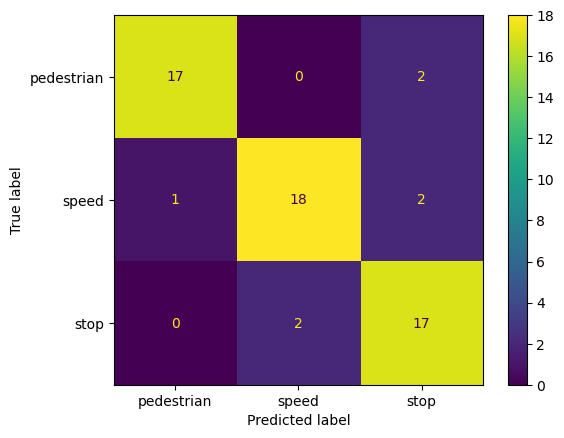

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_dec_tree)
plt.show()

In [14]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)
model_KNN.score(X_test, y_test)

0.9661016949152542

In [15]:
y_predict_KNN = model_KNN.predict(X_test)
y_predict_KNN

array(['pedestrian', 'pedestrian', 'pedestrian', 'speed', 'pedestrian',
       'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian',
       'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian',
       'pedestrian', 'pedestrian', 'pedestrian', 'pedestrian',
       'pedestrian', 'pedestrian', 'speed', 'speed', 'speed', 'speed',
       'speed', 'speed', 'speed', 'speed', 'stop', 'speed', 'speed',
       'speed', 'speed', 'speed', 'speed', 'speed', 'speed', 'speed',
       'speed', 'speed', 'speed', 'stop', 'stop', 'stop', 'stop', 'stop',
       'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop', 'stop',
       'stop', 'stop', 'stop', 'stop', 'stop', 'stop'], dtype=object)

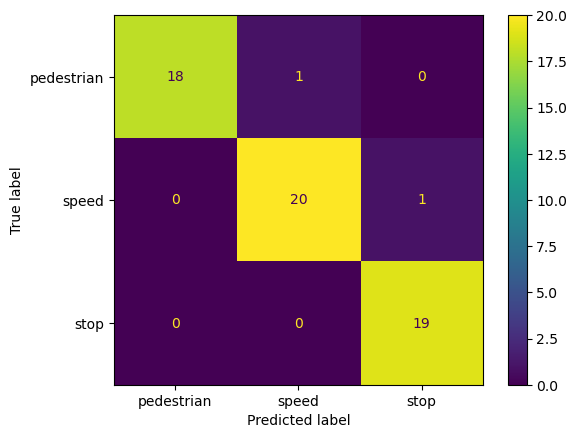

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_KNN)
plt.show()